# 5. 更多模型指标对比

In [6]:
import sys
sys.path = ["../../.."] + sys.path # 切换到项目目录下

import scanpy as sc
import scvelo as scv
import velovgi

Global seed set to 0
/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [24]:
# model_name_list = [
                # "batch_effect_review",
#                    "batch_effect_latentvelo",
#                    "deepvelo",
#                    "latentvelo",
#                    "scvelo_deterministic",
#                    "scvelo_dynamical",
#                    "scvelo_stochastic",
#                    "veloae",
#                    "velovae",
#                    "velovi",
#                    ]

model_name_list = [
                "BatchEffectReview",
                   "BatchEffectLatentvelo",
                   "Deepvelo",
                   "Latentvelo",
                   "ScveloDeterministic",
                   "ScveloDynamical",
                   "ScveloStochastic",
                   "Veloae",
                   "Velovae",
                   "Velovi",
                   ]
adata_filename_list = [
                    "./data/erythroid_lineage_review_velocity.h5ad",
                       "./data/erythroid_lineage_latentvelo_velocity.h5ad",
                       "./data/other_methods_adata/deepvelo/deepvelo_adata.h5ad",
                       "./data/other_methods_adata/latentvelo/latentvelo_adata.h5ad",
                       "./data/other_methods_adata/scvelo/scvelo_deterministic_adata.h5ad",
                       "./data/other_methods_adata/scvelo/scvelo_dynamical_adata.h5ad",
                       "./data/other_methods_adata/scvelo/scvelo_stochastic_adata.h5ad",
                       "./data/other_methods_adata/veloae/veloae_adata.h5ad",
                       "./data/other_methods_adata/velovae/velovae_adata.h5ad",
                       "./data/other_methods_adata/velovi/velovi_adata.h5ad",
                       ]

adata_list = []
for adata_filename in adata_filename_list:
    print(adata_filename)
    adata = scv.read(adata_filename)
    adata_list.append(adata)


cluster_key = "celltype"

model_name_list.append("velovgi")
adata = velovgi.tl.read_adata("./data/adata/") # 后续的绘图都是在这个处理后的adata上做的
adata_list.append(adata)

./data/erythroid_lineage_review_velocity.h5ad
./data/erythroid_lineage_latentvelo_velocity.h5ad
./data/other_methods_adata/deepvelo/deepvelo_adata.h5ad
./data/other_methods_adata/latentvelo/latentvelo_adata.h5ad
./data/other_methods_adata/scvelo/scvelo_deterministic_adata.h5ad
./data/other_methods_adata/scvelo/scvelo_dynamical_adata.h5ad
./data/other_methods_adata/scvelo/scvelo_stochastic_adata.h5ad
./data/other_methods_adata/veloae/veloae_adata.h5ad
./data/other_methods_adata/velovae/velovae_adata.h5ad
./data/other_methods_adata/velovi/velovi_adata.h5ad
load ./data/adata//adata.h5ad
load ./data/adata//sample_recover.pkl


In [25]:
model_name_list = ["%s_ery"%model_name for model_name in model_name_list] 
# model_name_list2 = ["ery_%s"%model_name for model_name in model_name_list]

区分模型和数据


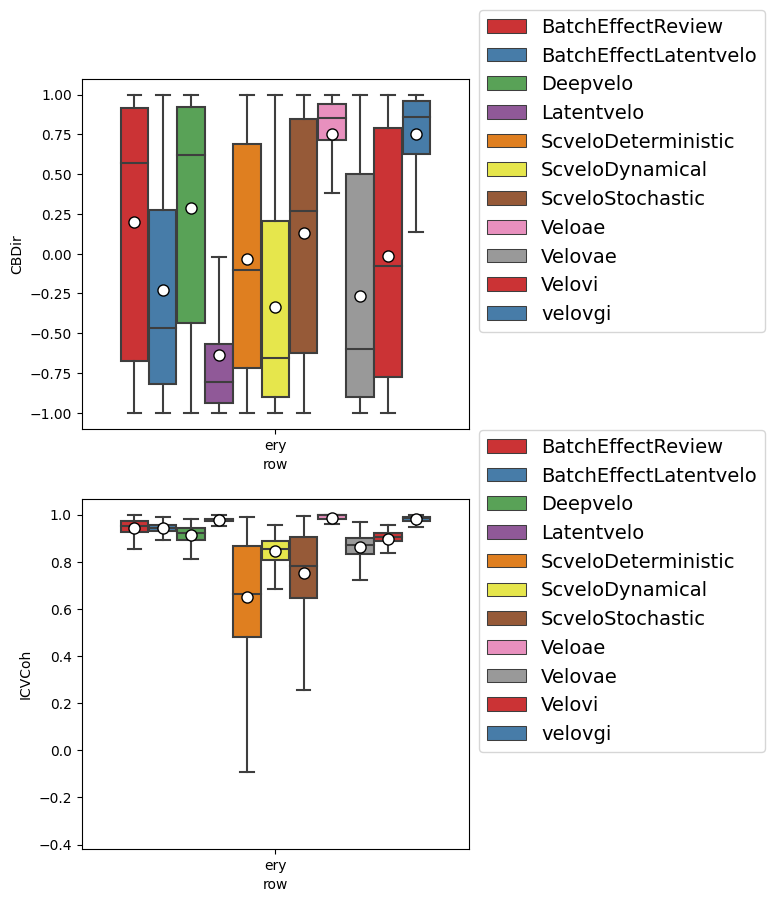

In [31]:
cluster_edges = [
    ("Blood progenitors 1", "Blood progenitors 2"), 
    ("Blood progenitors 2", "Erythroid1"), 
    ("Erythroid1", "Erythroid2"), 
    ("Erythroid2", "Erythroid3")
    ] # 已知的细胞类型间的分化信息


df = velovgi.tl.get_metric_total_df(model_name_list, adata_list, cluster_edges, cluster_key) # 指标计算
# df = velovgi.tl.get_metric_total_df(model_name_list2, adata_list, cluster_edges, cluster_key) # 指标计算

velovgi.pl.plot_metric_total_df(df) # 指标绘制